In [1]:
import time
import numpy as np
import pandas as pd
from gmm import GMM
from tqdm import tqdm
import matplotlib.pyplot as plt
from multiprocessing import Pool
from collections import defaultdict
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split

plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 8,6
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("../datasets/2A/consolidated_train.csv")
X = df.drop("class", axis=1).to_numpy()
df.head()

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.301071,0.207291,0.163574,0.080124,0.054138,0.041107,0.048340,0.104355,0.028275,...,0.211029,0.176437,0.016968,0.029282,0.108093,0.173035,0.205368,0.192215,0.143951,0.131088
1,0,0.149094,0.178650,0.383118,0.217911,0.069717,0.001373,0.000122,0.000015,0.127670,...,0.003387,0.000168,0.121246,0.041306,0.045090,0.160141,0.290756,0.318909,0.022049,0.000504
2,0,0.033218,0.092514,0.107178,0.058289,0.397430,0.066330,0.238052,0.006989,0.000793,...,0.231079,0.003769,0.001465,0.004150,0.006897,0.028931,0.283752,0.127716,0.543488,0.003601
3,0,0.009476,0.132507,0.375351,0.090302,0.271347,0.112000,0.008942,0.000076,0.007553,...,0.096375,0.010620,0.007843,0.000443,0.030304,0.102646,0.246140,0.513321,0.088379,0.010925
4,0,0.169357,0.262299,0.253281,0.152527,0.092209,0.038757,0.016174,0.015396,0.082397,...,0.020676,0.015976,0.072647,0.077484,0.163315,0.186646,0.181931,0.196167,0.090378,0.031433


In [3]:
classes = np.unique(df["class"])
gmm_list = defaultdict(list)
q_list = list(range(2,23))  

for i in classes:
    print("="*50)
    df_select = df[df["class"]==i]
    X_select = df_select.drop("class", axis=1).to_numpy()
    for q in q_list:
        gmm = GMM(q=q)
        gmm.fit(X_select)
        gmm_list[i].append(gmm)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:06<?, ?it/s]


In [4]:
import pickle
fin = open("2a_gmm_results", "wb")
pickle.dump(gmm_list, fin)
fin.close()

In [5]:
df_test = pd.read_csv("../datasets/2A/consolidated_dev.csv")
X_test = df_test.drop("class", axis=1).to_numpy()
X = df.drop("class", axis=1).to_numpy()
df_test.head()

,class,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,0.399170,0.279617,0.052292,0.046127,0.066757,0.082733,0.060654,0.012650,0.071945,...,0.063065,0.008881,0.145233,0.202499,0.071503,0.222473,0.248734,0.058716,0.044266,0.006577
1,0,0.150986,0.175201,0.154205,0.274918,0.140121,0.068146,0.029816,0.006607,0.100555,...,0.024231,0.006195,0.123734,0.251984,0.176926,0.113693,0.048813,0.262314,0.018860,0.003677
2,0,0.256210,0.246597,0.150299,0.097305,0.074341,0.069366,0.032928,0.072952,0.110901,...,0.113846,0.038269,0.140778,0.132614,0.082352,0.156189,0.146027,0.110016,0.113525,0.118500
3,0,0.000000,0.007507,0.235611,0.169693,0.104401,0.096832,0.163010,0.222946,0.000000,...,0.000000,0.000000,0.004272,0.934540,0.061188,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0.312500,0.028046,0.033295,0.118454,0.123184,0.141037,0.123123,0.120361,0.330658,...,0.066025,0.025635,0.336350,0.012329,0.066742,0.144058,0.244949,0.192459,0.001022,0.002090


In [6]:
accuracy_list = []
test_accuracy_list = []
for i in tqdm(range(len(q_list))):
    gmm0 = gmm_list[0][i]
    gmm1 = gmm_list[1][i]
    gmm2 = gmm_list[2][i]
    gmm3 = gmm_list[3][i]
    gmm4 = gmm_list[4][i]
    
    # Training
    a = gmm0.indv_log_likelihood(X)
    b = gmm1.indv_log_likelihood(X)
    c = gmm2.indv_log_likelihood(X)
    d = gmm3.indv_log_likelihood(X)
    e = gmm4.indv_log_likelihood(X)

    f = np.hstack((a, b, c, d, e))
    pred = np.argmax(f, axis=1)
    accuracy_list.append(np.sum(pred == df["class"])/df["class"].size)
    
    # Testing
    a = gmm0.indv_log_likelihood(X_test)
    b = gmm1.indv_log_likelihood(X_test)
    c = gmm2.indv_log_likelihood(X_test)
    d = gmm3.indv_log_likelihood(X_test)
    e = gmm4.indv_log_likelihood(X_test)

    f = np.hstack((a, b, c, d, e))
    pred = np.argmax(f, axis=1)
    test_accuracy_list.append(np.sum(pred == df_test["class"])/df_test["class"].size)

 10%|▉         | 2/21 [00:29<04:45, 15.01s/it]/home/sowmya/Desktop/cs5691/assignment/assignment2/codes/gmm.py:99: RuntimeWarning: divide by zero encountered in log
  lk[i] = np.log(val)
100%|██████████| 21/21 [24:07<00:00, 68.94s/it] 


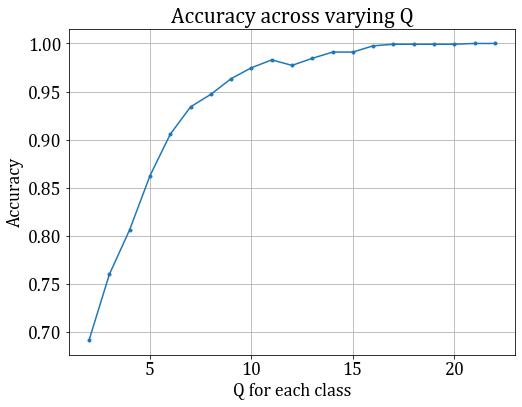

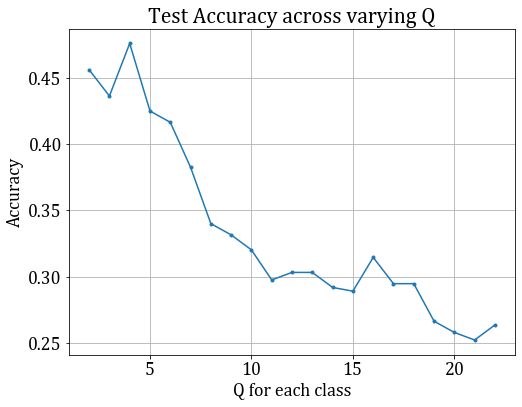

In [7]:
plt.plot(q_list, accuracy_list, '.-')
plt.title("Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()

plt.plot(q_list, test_accuracy_list, '.-')
plt.title("Test Accuracy across varying Q")
plt.xlabel("Q for each class")
plt.ylabel("Accuracy")
plt.show()